**Importing and Visulazing Data**

In [3]:
from pandas_datareader import data as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#Pulling Data
tsla = wb.DataReader('TSLA', 'yahoo', '2013-1-1', '2018-1-1')
f = wb.DataReader('F', 'yahoo', '2013-1-1', '2018-1-1')
gm = wb.DataReader('GM', 'yahoo', '2013-1-1', '2018-1-1')

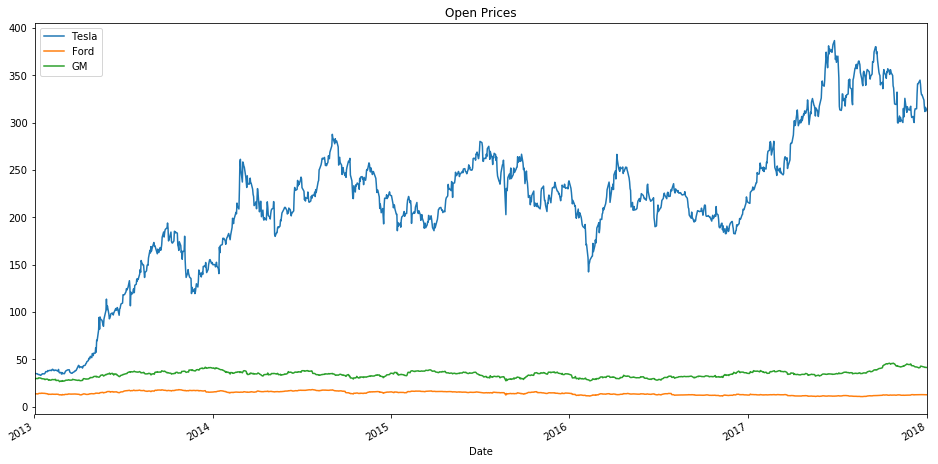

In [23]:
#Plottiong open prices
tsla['Open'].plot(label='Tesla', figsize=(16,8), title='Open Prices')
f['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend();

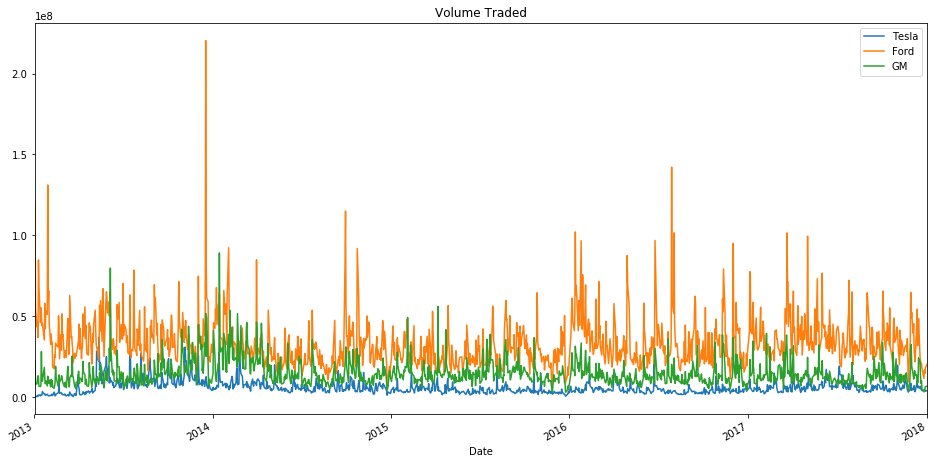

In [15]:
#Plotting Volume
tsla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
f['Volume'].plot(label='Ford')
gm['Volume'].plot(label='GM')
plt.legend();

Finding the maximum trading volume for Ford and seeing what happened in late 2013 (Volume Spiked)

In [17]:
#This shows the date of that spike for Ford
f['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [20]:
#Total money being traded
tsla['Total Traded'] = tsla['Open'] * tsla['Volume']
f['Total Traded'] = f['Open'] * f['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

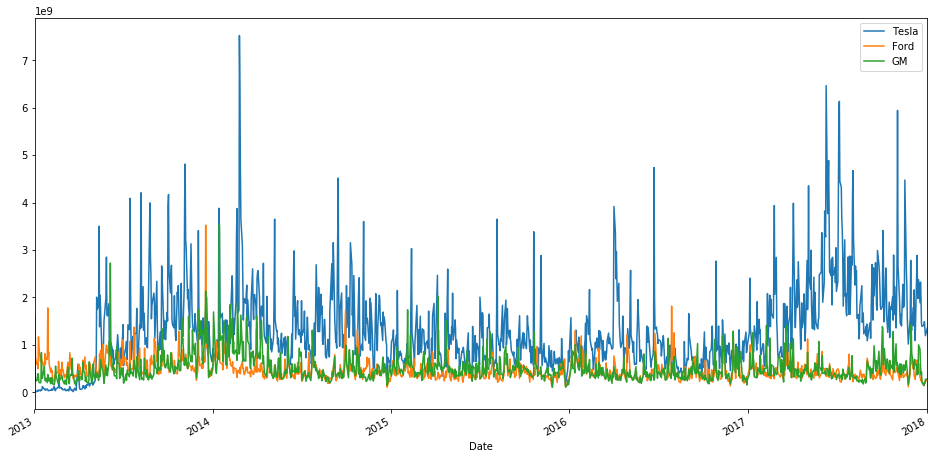

In [21]:
#Plotting total money traded
tsla['Total Traded'].plot(label='Tesla',figsize=(16,8))
f['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend();

Huge amount of money traded for TSLA in early 2014.

In [22]:
#Find the date for Tesla the most money was traded
tsla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

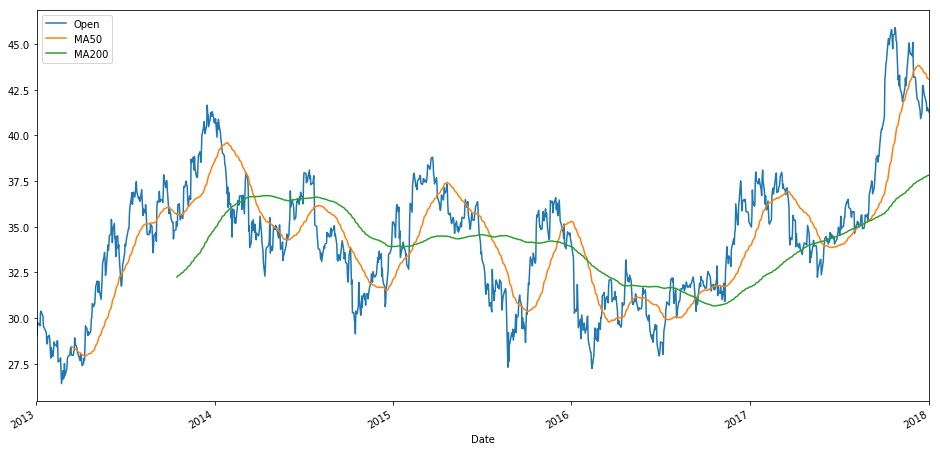

In [27]:
#Moving averages for GM. Plotting the MA50 and MA200
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8));

Creating a scatter matrix plot to see the relationship between the 3 securities:
    https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [28]:
from pandas.plotting import scatter_matrix

In [30]:
car_comp = pd.concat([tsla['Open'], f['Open'], gm['Open']], axis=1)
car_comp.columns = ['TSLA Open', 'F Open', 'GM Open']
car_comp.head()

,TSLA Open,F Open,GM Open
Date,,,
2013-01-02,35.000000,13.23,29.410000
2013-01-03,35.180000,13.24,29.049999
2013-01-04,34.799999,13.51,29.740000
2013-01-07,34.799999,13.52,29.639999
2013-01-08,34.500000,13.38,29.660000


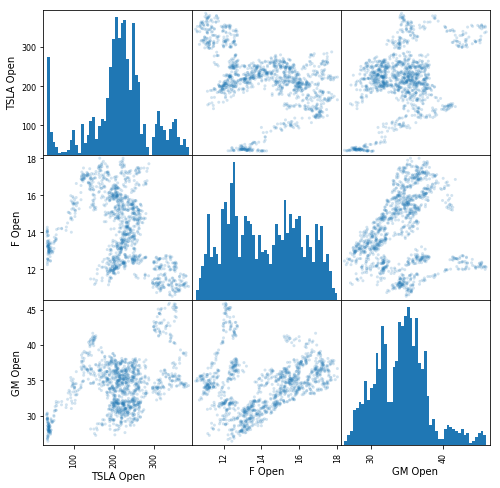

In [33]:
scatter_matrix(car_comp, figsize=(8,8), alpha=0.2,hist_kwds={'bins':50});

Candle stick chart: matplotlib.finance does not work anymore. Use the alternative

In [37]:
#Creating sticks for Ford in 2013 for Jan & Feb
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

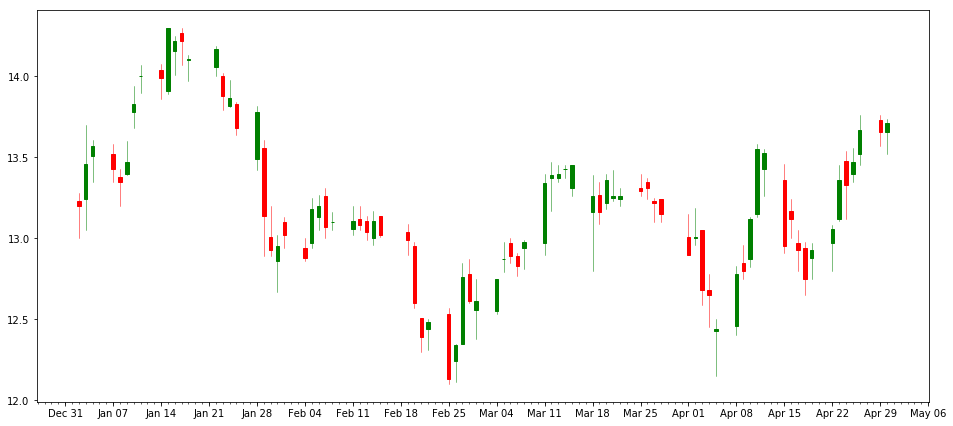

In [47]:
f_reset = f.loc['2013-01':'2013-04'].reset_index()
f_reset['date_ax'] = f_reset['Date'].apply(lambda date: date2num(date))

list_of_cols = ['date_ax','Open', 'High', 'Low', 'Close']
f_values = [tuple(vals) for vals in f_reset[list_of_cols].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, f_values, width=0.5, colorup='g',colordown='r');

**Basic Financial Analysis**

In [48]:
#Returns
tsla['returns'] = tsla['Close'].pct_change(1)
f['returns'] = f['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

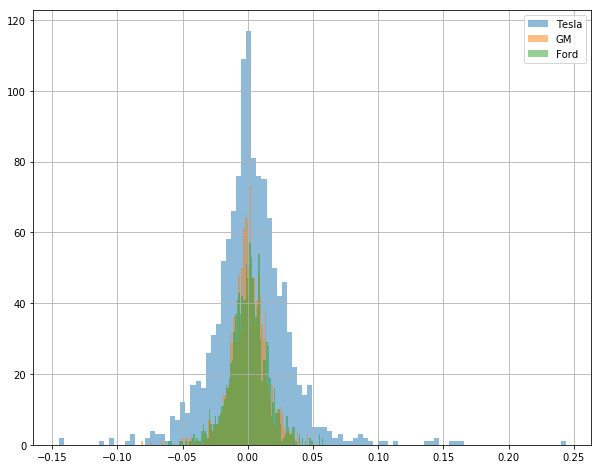

In [51]:
#Histograms for each security
tsla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
f['returns'].hist(bins=100,label='GM',alpha=0.5)
gm['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend();

Can see that GM and Ford tend to be more stable compared to Tesla

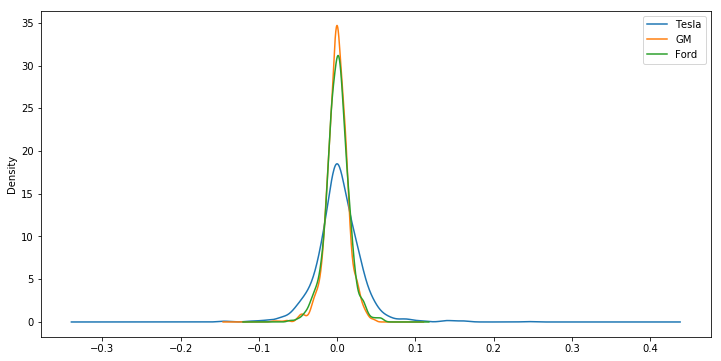

In [52]:
tsla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
f['returns'].plot(kind='kde',label='GM')
gm['returns'].plot(kind='kde',label='Ford')
plt.legend();

Pretty much showing GM shows to be much more stable out of the three since it stays around its avg most of the time.

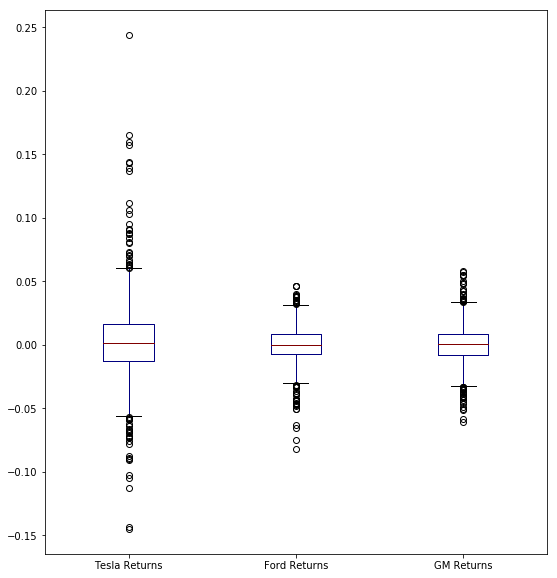

In [64]:
#Box_Plots Comparing Returns
box_df = pd.concat([tsla['returns'],f['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Returns','Ford Returns','GM Returns']
box_df.plot(kind='box',figsize=(9,10),colormap='jet');

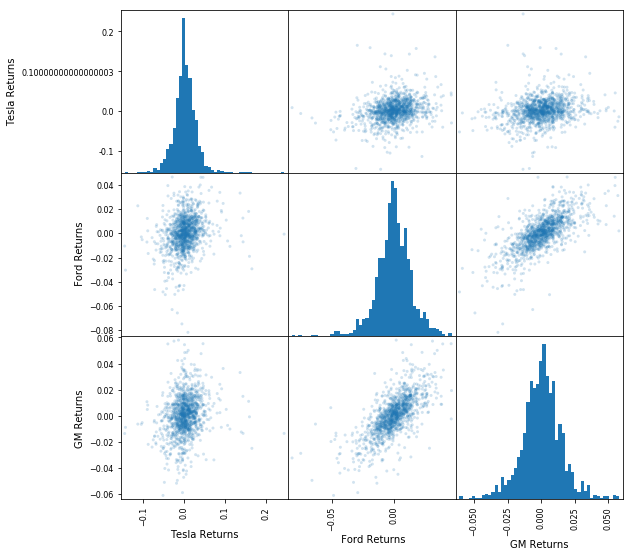

In [62]:
#Comparing Daily Returns between the stocks
scatter_matrix(box_df,figsize=(9,9),alpha=0.2,hist_kwds={'bins':50});

Ford and GM look to have a close relationship together

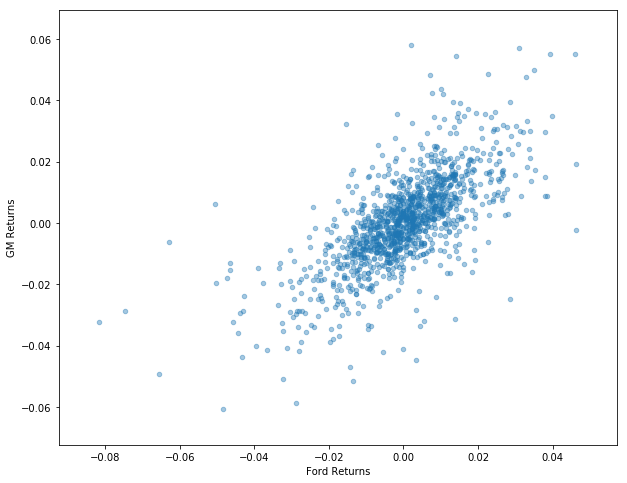

In [69]:
box_df.plot(kind='scatter',x='Ford Returns',y='GM Returns',alpha=0.4,figsize=(10,8));

**Cumulative Daily Returns:**
    $ i_i = (1+r_t) * i_{t-1} $

In [70]:
tsla['Cumulative Return'] = (1 + tsla['returns']).cumprod()
f['Cumulative Return'] = (1 + f['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

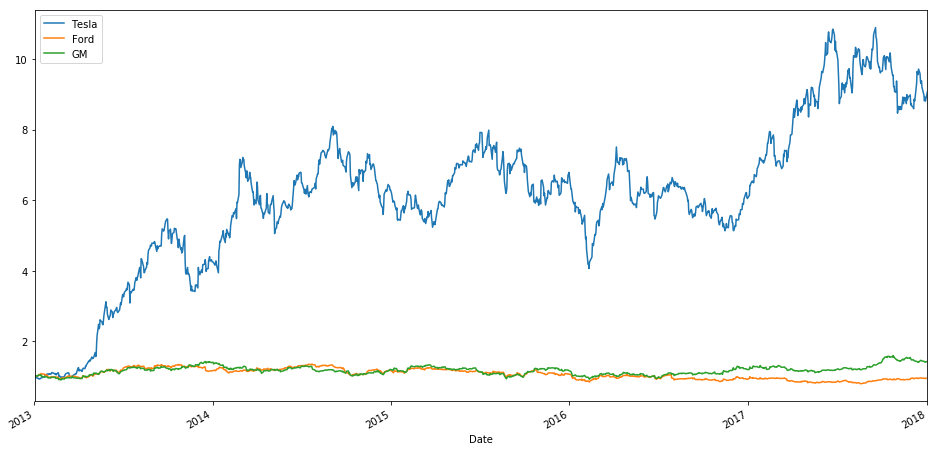

In [71]:
#Seeing which security showed the highest return for $1 invested and which showed the lowest?
tsla['Cumulative Return'].plot(label='Tesla', figsize=(16,8))
f['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend();